In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
from scipy.stats import linregress

In [27]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [28]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [29]:
coordinates

[(-12.564405278695872, 59.10593285712949),
 (-56.3243113091067, 86.93095474929697),
 (57.168245648574555, -112.58201834502775),
 (-36.3716834360431, -161.58029370685318),
 (45.34674729904299, 169.89682592332366),
 (-39.22479306687806, -2.98519790885814),
 (-77.1656102799869, -134.34814735309521),
 (-5.72660947713419, -150.5908744075023),
 (-2.021332776646503, -65.70999749431),
 (-16.750320644095837, -147.62893512404835),
 (49.00304210752063, -96.69468327210838),
 (56.84132860674572, -138.7008651142786),
 (46.247651330103935, -169.1431046864998),
 (-50.44982389762911, -153.82868256252607),
 (29.86347279210125, -71.71877447443264),
 (20.038022465851242, -125.64509039959532),
 (-42.1146203765323, 23.3317138135462),
 (-7.3596728548342725, -73.06926711983796),
 (16.63898329014725, 75.19620044395305),
 (68.85321959805734, 105.66675695268236),
 (-41.353654273226184, 38.04986991977839),
 (-60.9316871103374, -1.390901146977484),
 (40.204849990662325, -2.2583748022273085),
 (-23.244672407276212,

In [30]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [31]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [32]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
# In the code block, we have initialized the counters at 1 because we want the first iteration of the logging for each recorded response and the set to start at 1.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cap malheureux
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | athabasca
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | saldanha
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | faanui
Processing Record 9 of Set 1 | maraa
Processing Record 10 of Set 1 | tautira
Processing Record 11 of Set 1 | steinbach
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | marsh harbour
Processing Record 16 of Set 1 | guerrero negro
Processing Record 17 of Set 1 | plettenberg bay
Processing Record 18 of Set 1 | mancio lima
Processing Record 19 of Set 1 | athni
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 22 of Set 1 | cape town
Pro

Processing Record 36 of Set 4 | tuy hoa
Processing Record 37 of Set 4 | asau
Processing Record 38 of Set 4 | bairiki
Processing Record 39 of Set 4 | ouango
Processing Record 40 of Set 4 | shingu
Processing Record 41 of Set 4 | dunedin
Processing Record 42 of Set 4 | geraldton
Processing Record 43 of Set 4 | hami
Processing Record 44 of Set 4 | tuatapere
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | new norfolk
Processing Record 47 of Set 4 | belaya gora
Processing Record 48 of Set 4 | mahebourg
Processing Record 49 of Set 4 | purranque
Processing Record 50 of Set 4 | mercedes
Processing Record 1 of Set 5 | burkhala
City not found. Skipping...
Processing Record 2 of Set 5 | kaitangata
Processing Record 3 of Set 5 | kodiak
Processing Record 4 of Set 5 | sur
Processing Record 5 of Set 5 | sobolevo
Processing Record 6 of Set 5 | sinnamary
Processing Record 7 of Set 5 | cidreira
Processing Record 8 of Set 5 | talnakh
Processing Record 9 of Set 5 | camopi
Processing

Processing Record 27 of Set 8 | high level
Processing Record 28 of Set 8 | lavrentiya
Processing Record 29 of Set 8 | rudbar
Processing Record 30 of Set 8 | puerto colombia
Processing Record 31 of Set 8 | paamiut
Processing Record 32 of Set 8 | chavakachcheri
Processing Record 33 of Set 8 | elat
Processing Record 34 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 35 of Set 8 | rockland
Processing Record 36 of Set 8 | kachikau
City not found. Skipping...
Processing Record 37 of Set 8 | muros
Processing Record 38 of Set 8 | imeni poliny osipenko
Processing Record 39 of Set 8 | gigmoto
Processing Record 40 of Set 8 | aksarka
Processing Record 41 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 42 of Set 8 | pangai
Processing Record 43 of Set 8 | praia
Processing Record 44 of Set 8 | port pirie
Processing Record 45 of Set 8 | paita
Processing Record 46 of Set 8 | manakara
Processing Record 47 of Set 8 | necochea
Processing Record 48 of Set 8 | gasa
Processi

Processing Record 14 of Set 12 | krasnoselkup
Processing Record 15 of Set 12 | mareeba
Processing Record 16 of Set 12 | paradwip
City not found. Skipping...
Processing Record 17 of Set 12 | solano
Processing Record 18 of Set 12 | shihezi
Processing Record 19 of Set 12 | karpathos
Processing Record 20 of Set 12 | ritchie
Processing Record 21 of Set 12 | carutapera
Processing Record 22 of Set 12 | poum
Processing Record 23 of Set 12 | barawe
City not found. Skipping...
Processing Record 24 of Set 12 | viligili
City not found. Skipping...
Processing Record 25 of Set 12 | kisangani
Processing Record 26 of Set 12 | khandyga
Processing Record 27 of Set 12 | miquelon
Processing Record 28 of Set 12 | minsk
Processing Record 29 of Set 12 | naryan-mar
Processing Record 30 of Set 12 | yei
Processing Record 31 of Set 12 | waingapu
Processing Record 32 of Set 12 | kajaani
Processing Record 33 of Set 12 | portland
Processing Record 34 of Set 12 | alindao
Processing Record 35 of Set 12 | olga
Process

In [33]:
len(city_data)

544

In [34]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cap Malheureux,-19.98,57.61,71.01,61,26,3.00,MU,2020-08-19 23:43:57
1,Busselton,-33.65,115.33,46.00,83,78,1.21,AU,2020-08-19 23:43:57
2,Athabasca,54.72,-113.29,73.94,44,28,3.04,CA,2020-08-19 23:43:57
3,Avarua,-21.21,-159.78,73.40,83,100,21.92,CK,2020-08-19 23:43:57
4,Nikolskoye,59.70,30.79,55.00,93,0,2.24,RU,2020-08-19 23:41:17
5,Saldanha,-33.01,17.94,44.60,81,57,2.24,ZA,2020-08-19 23:43:58
6,Rikitea,-23.12,-134.97,70.14,86,100,22.26,PF,2020-08-19 23:41:34
7,Faanui,-16.48,-151.75,78.42,77,30,22.73,PF,2020-08-19 23:43:58
8,Maraa,-1.83,-65.37,81.37,69,47,2.55,BR,2020-08-19 23:43:58
9,Tautira,-17.73,-149.15,82.40,65,75,4.70,PF,2020-08-19 23:43:59


In [44]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
reordered_city_df = city_data_df[new_column_order]
reordered_city_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cap Malheureux,MU,2020-08-19 23:43:57,-19.98,57.61,71.01,61,26,3.00
1,Busselton,AU,2020-08-19 23:43:57,-33.65,115.33,46.00,83,78,1.21
2,Athabasca,CA,2020-08-19 23:43:57,54.72,-113.29,73.94,44,28,3.04
3,Avarua,CK,2020-08-19 23:43:57,-21.21,-159.78,73.40,83,100,21.92
4,Nikolskoye,RU,2020-08-19 23:41:17,59.70,30.79,55.00,93,0,2.24
...,...,...,...,...,...,...,...,...,...
539,Jerome,US,2020-08-19 23:46:11,42.72,-114.52,100.00,36,1,3.36
540,Harper,LR,2020-08-19 23:46:12,4.38,-7.72,75.45,85,100,11.79
541,Khani,GE,2020-08-19 23:46:12,41.96,42.96,68.00,100,28,3.80
542,Paducah,US,2020-08-19 23:41:22,37.08,-88.60,77.00,57,90,8.05


In [45]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [46]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [47]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/19/20'

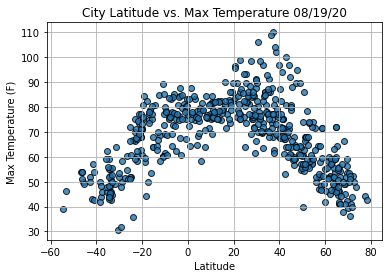

In [48]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

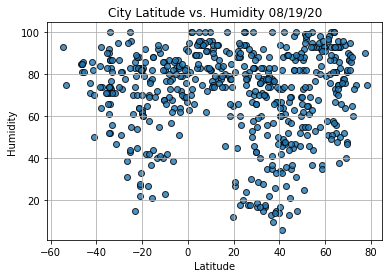

In [49]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

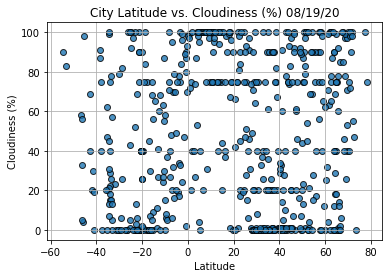

In [50]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

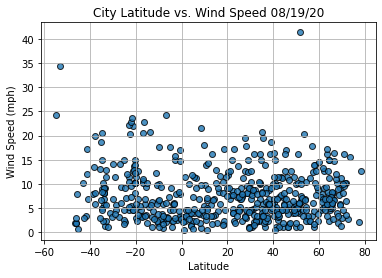

In [51]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [53]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [55]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Lat                        -46.19
Lng                        168.86
Max Temp                       54
Humidity                       85
Cloudiness                     33
Wind Speed                   1.99
Country                        NZ
Date          2020-08-19 23:44:00
Name: 13, dtype: object

In [56]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

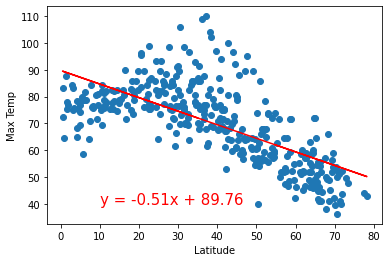

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = 'Linear Regression on the Northern Hemisphere for Maximum Temperature'
# Call the function.
plot_linear_regression(x_values, y_values,
                       title, 'Max Temp',(10,40))
#TODO: get title?

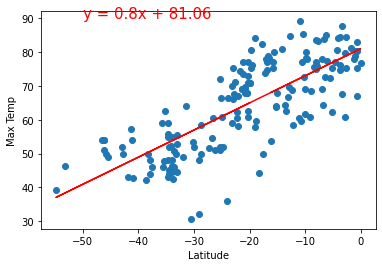

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
## FINDING R/P-Value?

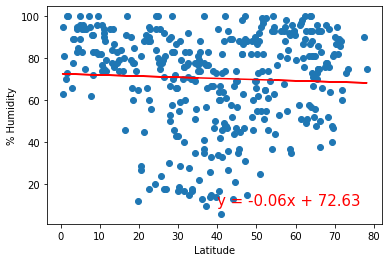

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

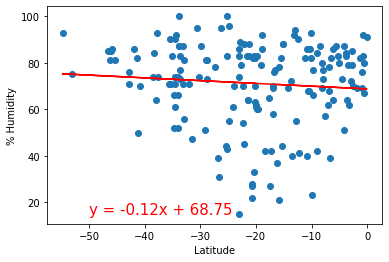

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [74]:
## CHECK R-Values for plots?

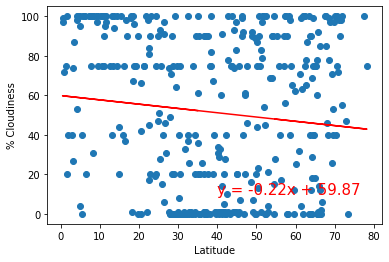

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

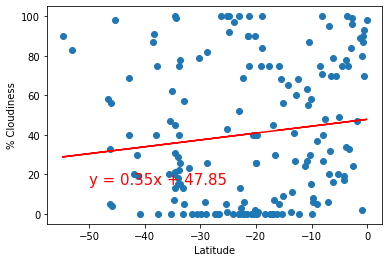

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,15))

In [77]:
## check r-values

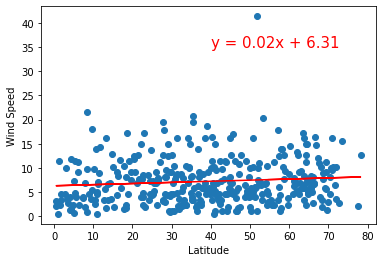

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

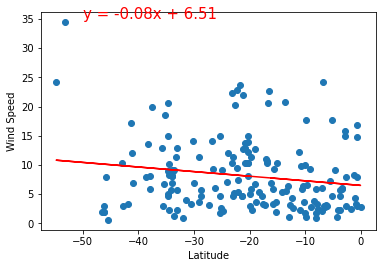

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

In [ ]:
## r-values